In [ ]:
#code to plot an ellipse

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.generic import build_circle
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma

In [3]:
a = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')#anticyclonic eddy data
c = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
#a = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')
#c = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
SSH_data = xr.open_dataset('/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2004010100_t000.nc')

File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'


In [4]:
from matplotlib import pyplot as plt
from numpy import cos, linspace, radians, sin

from py_eddy_tracker import data
from py_eddy_tracker.generic import coordinates_to_local, local_to_coordinates
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.poly import fit_circle_, fit_ellipse

def build_circle(x0, y0, r):
    angle = radians(linspace(0, 360, 50))
    x_norm, y_norm = cos(angle), sin(angle)
    return local_to_coordinates(x_norm * r, y_norm * r, x0, y0)


def build_ellipse(x0, y0, a, b, theta):
    angle = radians(linspace(0, 360, 50))
    x = a * cos(theta) * cos(angle) - b * sin(theta) * sin(angle)
    y = a * sin(theta) * cos(angle) + b * cos(theta) * sin(angle)
    return local_to_coordinates(x, y, x0, y0)

File was created with py-eddy-tracker version 'None' but software version is '3.6'


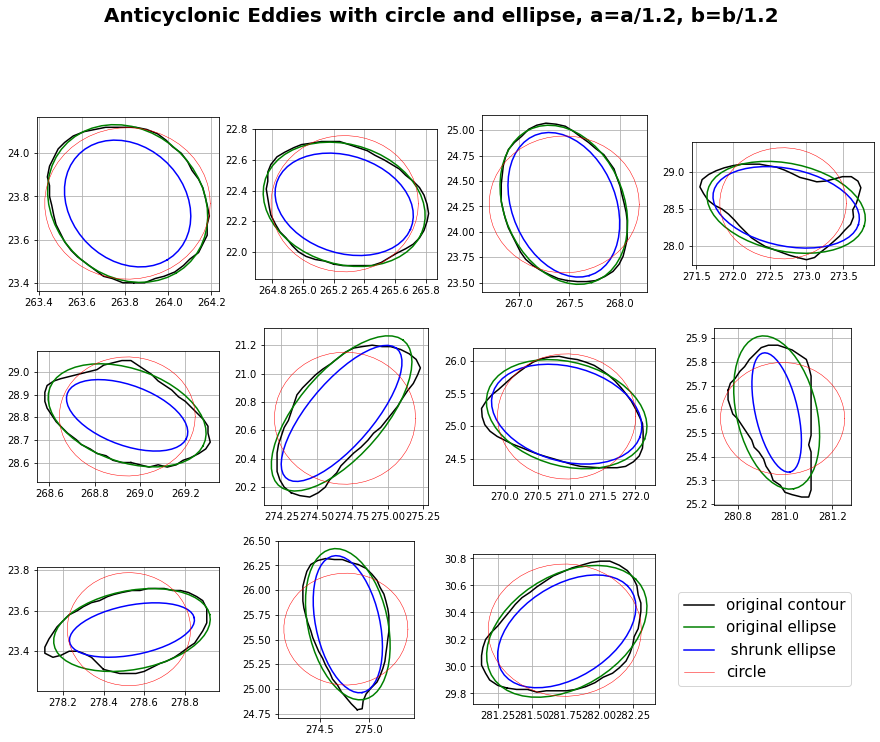

In [11]:
a = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')
xs, ys = a.contour_lon_s, a.contour_lat_s
#print(np.shape(xs))

fig = plt.figure(figsize=(15, 15))
fig.suptitle('Anticyclonic Eddies with circle and ellipse, a=a/1.2, b=b/1.2',fontsize=20,fontweight='bold')

j = 1
for i in np.arange(0,11,1):
    x, y = xs[i], ys[i]
    x0_, y0_ = x.mean(), y.mean()
    x_, y_ = coordinates_to_local(x, y, x0_, y0_)
    ax = fig.add_subplot(4, 4, j)
    ax.grid(), ax.set_aspect("equal")
    ax.plot(x, y, label="original contour", color="black")
    x0, y0, a, b, theta = fit_ellipse(x_, y_)
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    #m=a/1.2
    #n=b/1.2
    w=-2*(4000)+a
    h=-2*(4000)+b
    ax.plot(*build_ellipse(x0, y0, a, b, theta), label="original ellipse", color="green")
    ax.plot(*build_ellipse(x0, y0, w, h, theta), label=" shrunk ellipse", color="blue")
    x0, y0, radius, shape_error = fit_circle_(x_, y_)
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    ax.plot(*build_circle(x0, y0, radius), label="circle", color="red", lw=0.5)
    #_= ax.legend(loc="best")
    if j == 16:
        break
    j += 1
_= ax.legend(loc=9,bbox_to_anchor=(1.6,.8),fontsize=15)#,borderpad=2

File was created with py-eddy-tracker version 'None' but software version is '3.6'


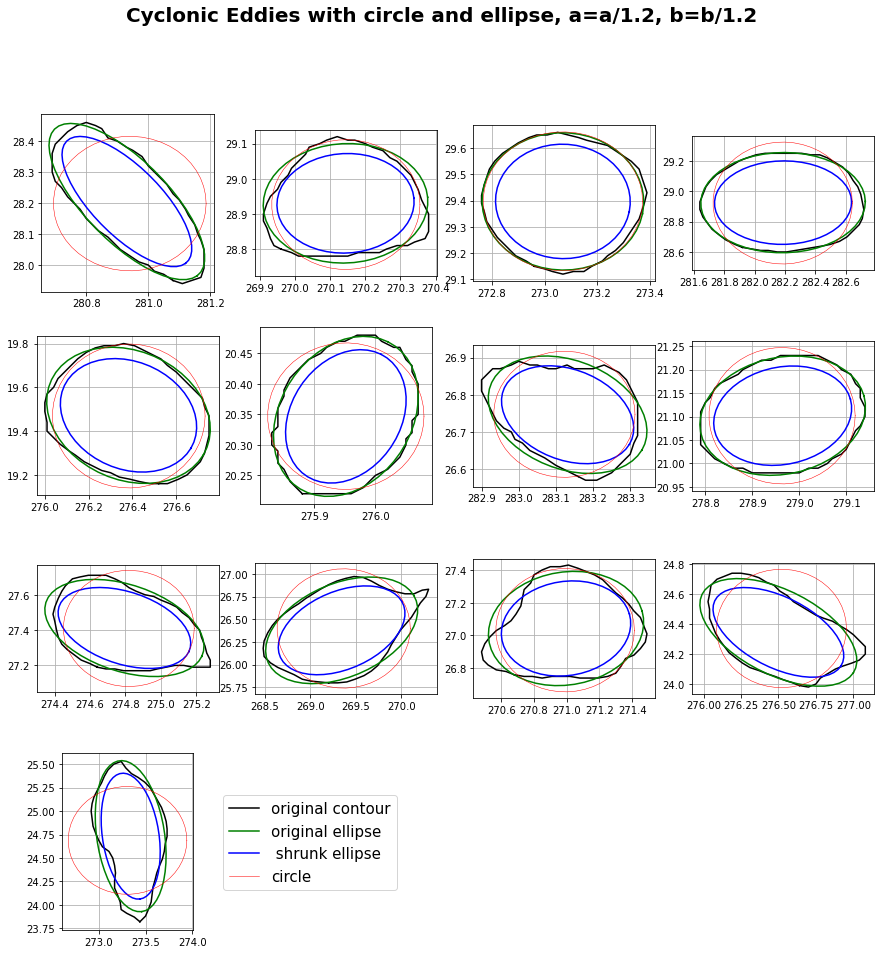

In [6]:
c = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
#a = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')
xs, ys = c.contour_lon_s, c.contour_lat_s
#print(np.shape(xs))

fig = plt.figure(figsize=(15, 15))
fig.suptitle('Cyclonic Eddies with circle and ellipse, a=a/1.2, b=b/1.2',fontsize=20,fontweight='bold')

j = 1
for i in np.arange(0,13,1):
    x, y = xs[i], ys[i]
    x0_, y0_ = x.mean(), y.mean()
    x_, y_ = coordinates_to_local(x, y, x0_, y0_)
    ax = fig.add_subplot(4, 4, j)
    ax.grid(), ax.set_aspect("equal")
    ax.plot(x, y, label="original contour", color="black")
    x0, y0, a, b, theta = fit_ellipse(x_, y_)
    m=a/1.2
    n=b/1.2
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    ax.plot(*build_ellipse(x0, y0, a, b, theta), label="original ellipse", color="green")
    ax.plot(*build_ellipse(x0, y0, m, n, theta), label=" shrunk ellipse", color="blue")
    x0, y0, radius, shape_error = fit_circle_(x_, y_)
    x0, y0 = local_to_coordinates(x0, y0, x0_, y0_)
    ax.plot(*build_circle(x0, y0, radius), label="circle", color="red", lw=0.5)
    #_= ax.legend(loc="best")
    if j == 16:
        break
    j += 1
_= ax.legend(loc=9,bbox_to_anchor=(1.9,.8),fontsize=15)#,borderpad=2

In [7]:
print(a)

90282.80049096604
